In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
melon_df = pd.read_csv('melon_reviews.csv',lineterminator='\n')

In [111]:
melon_df

,Unnamed: 0,id,artist,album,date,duration,description,thumbnail,views,score,genre,shirt,shirt_rgb
0,0,o_tvpnk5HwY,Cordae,From a Birds Eye View,2022-01-21T03:38:38Z,PT9M11S,listen: <url> despite cordae's now elevated p...,https://i.ytimg.com/vi/o_tvpnk5HwY/hqdefault.jpg,206512.0,6.0,"['conscious hip hop', 'trap rap']",other,"[(73, 72, 76), (184, 182, 183), (156, 156, 164)]"
1,1,NDAQaePWUwE,foxtails,fawn,2022-01-20T02:37:41Z,PT7M10S,listen: <url> fawn is a breath of fresh air f...,https://i.ytimg.com/vi/NDAQaePWUwE/hqdefault.jpg,120721.0,8.0,['chamber screamo'],yellow_check,"[(178, 161, 130), (55, 43, 48), (86, 73, 70)]"
2,2,scdj90F112k,Earl Sweatshirt,SICK!,2022-01-18T05:23:50Z,PT7M32S,"listen: <url> for me, the efficacy and appeal...",https://i.ytimg.com/vi/scdj90F112k/hqdefault.jpg,286477.0,6.0,['abstract hip hop'],other,"[(218, 173, 167), (180, 58, 75), (16, 11, 9)]"
3,3,HjYZe98PoWE,Roddy Ricch,Live Life Fast,2022-01-14T20:55:21Z,PT6M6S,listen: <url> llf follows up on none of the p...,https://i.ytimg.com/vi/HjYZe98PoWE/hqdefault.jpg,208760.0,3.0,"['pop rap', 'trap']",other,"[(149, 148, 151), (55, 58, 71), (80, 74, 79)]"
4,4,zw2UJpfIBaI,Nas,Magic,2022-01-13T06:20:17Z,PT5M9S,listen: <url> obviously magic isn't as robust...,https://i.ytimg.com/vi/zw2UJpfIBaI/hqdefault.jpg,207843.0,7.0,['east coast hip hop'],other,"[(226, 132, 109), (184, 85, 63), (195, 100, 76)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2345,DuMUDldrG3g,The National,High Violet,2010-05-12T05:43:37Z,PT5M55S,review: <url> / <url>\r \r the national's late...,https://i.ytimg.com/vi/DuMUDldrG3g/hqdefault.jpg,60141.0,6.0,"[""http://bit.ly/c9kigf\r\n\r\nthe national's l...",other,"[(127, 56, 71), (145, 139, 133), (80, 34, 49)]"
2346,2346,ySXryTlo9Ac,Holy Fuck,Latin,2010-05-10T19:12:42Z,PT5M40S,listen: <url> / <url> / <url>\r \r though it's...,https://i.ytimg.com/vi/ySXryTlo9Ac/hqdefault.jpg,11559.0,7.0,"[""http://bit.ly/bzrsr0\r\n\r\nthough it's not ...",other,"[(213, 206, 203), (74, 66, 66), (110, 98, 98)]"
2347,2347,cndwH6byJnk,Little Women,Throat,2010-05-09T18:18:46Z,PT7M47S,listen: <url> let me start by saying this alb...,https://i.ytimg.com/vi/cndwH6byJnk/hqdefault.jpg,29826.0,9.0,NaN,NaN,NaN
2348,2348,KCuamde9Atc,Flying Lotus,Cosmogramma,2010-05-05T18:47:37Z,PT7M52S,listen: <url> / <url> flying lotus' third alb...,https://i.ytimg.com/vi/KCuamde9Atc/hqdefault.jpg,168306.0,8.0,['http://bit.ly/apds3t'],other,"[(117, 69, 64), (152, 109, 100), (169, 116, 111)]"


Text(0.5, 1.0, 'Shirts By Year')

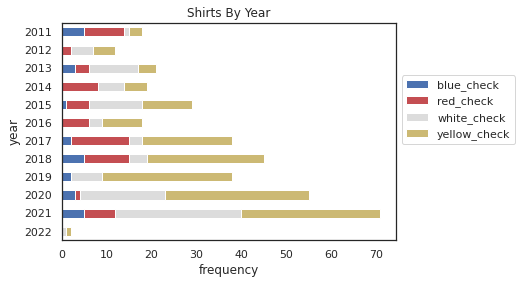

In [141]:
scores_by_year = melon_df
scores_by_year['year'] = pd.to_datetime(scores_by_year['date']).apply(lambda x:x.year)
scores_by_year = scores_by_year.loc[(scores_by_year['shirt'] != 'other') & (scores_by_year['year'] >=2011)]
scores_by_year = scores_by_year[['year','shirt']].dropna()
scores_by_year = pd.pivot_table(scores_by_year, index='year', columns='shirt', aggfunc=len, fill_value=0)

plt = scores_by_year.plot(kind='barh', stacked=True, color=['b','r','#DCDCDC','y'])
plt.set(facecolor = "white")
plt.invert_yaxis()
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.6))
plt.set_xlabel('frequency')
plt.set_title('Shirts By Year')

          shirt     score
0    blue_check  6.571429
1         other  6.184414
2     red_check  4.966102
3   white_check  6.255319
4  yellow_check  7.866279


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

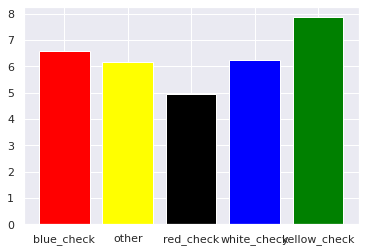

In [182]:
avg_shirt_score = melon_df[['shirt','score']].dropna().groupby('shirt').mean().reset_index()
print(avg_shirt_score)
# plt = avg_shirt_score.plot(kind='bar',stacked=True,legend=False, color=list('rgbk'))
sns.set()
plt.bar(avg_shirt_score['shirt'],height=avg_shirt_score['score'], color=['red','yellow','black','blue','green'])
plt.figure